## _Шипилова Полина, 303_
## _Задача №7_
# _Двумерное уравнение теплопроводности_

###  _Постановка задачи:_
Используя метод переменных направлений, решить краевую задачу:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} = \Delta u, 0<x<\pi/2, 0<y<\pi/2, t>0\\
& \frac{\partial u}{\partial x}\big|_{x=0}=\frac{\partial u}{\partial x}\big|_{x=\pi/2}=0\\
& \frac{\partial u}{\partial y}\big|_{y=0}=\frac{\partial u}{\partial y}\big|_{y=\pi/2}=0\\
& u\big|_{t=0}=cos4x\ cos2y
\end{aligned} \right. \label{eq1}
\end{equation} $$

###  _Аналитическое решение задачи_
Будем искать решение задачи в виде:
$$u(x,y,t)=T(t)V(x,y)$$
Тогда, решая исходную задачу методом разделения переменных, получаем:

$$\frac{T'(t)}{T(t)}=\frac{V''(x,y)}{V(x,y)}=-\lambda$$

Имеем задачу Штурма-Лиувилля для $V$:

$$
\left\{
\begin{aligned}
& V'' +\lambda V = 0\\
& \frac{\partial V}{\partial x}\big|_{x=0}=\frac{\partial V}{\partial x}\big|_{x=\pi/2}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=\pi/2}=0
\end{aligned} \right. \label{eq3} 
$$

Теперь, представляя функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и применяя метод разделения переменных, получим две задачи Штурма-Лиувилля на отрезке:

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X' \big|_{x=0}= X' \big|_{x=\pi/2}=0\\
\end{aligned} \right.   \Rightarrow X=cos(\sqrt{\nu} x)
$$

$$
\left\{
\begin{aligned}
& Y''+\mu Y = 0\\
&  \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=\pi/2}=0
\end{aligned} \right. \Rightarrow Y=cos(\sqrt{\mu} y) $$

где  $\nu = 4n^{2}$, $\mu = 4m^{2}$, $\lambda=\mu+\nu$

Тогда для функции $V$ получаем: $V_{nm}=cos(2nx)cos(2my)$

Из начальных условий получаем, что $ n=2, m=1 \Rightarrow \lambda =20 $.

Для $T(t)$ нужно решить следующую задачу:
$$
\begin{equation}\label{eq19} 
     \begin{cases}
     T'_{n,m}+ \lambda_{n,m}T_{n,m} = 0,\ t>0,\\
     T_{n,m}|_{t=0} = \varphi_{n,m},
     \end{cases}
\end{equation}
$$

где $\varphi(x,y) = \cos(4x)\cos(2y)$, а $\varphi_{n,m}$ - коэффициенты разложения функции $\varphi_(x,y)$ в ряд Фурье по системе функций ${V_{n,m}(x,y)}$.

Тогда, с учетом, что решение представляется в виде: 

$$V= \sum\limits_{n=0}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$
 
Получаем решение: $$u(x,y,t)=cos(4x)cos(2y)e^{-20t}$$

###  _График аналитического решения_
Построим график аналитического решения:

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import clear_output
import matplotlib as mpl

import time
from tqdm import tqdm

In [57]:
N, M, J = 30, 30, 30
x_start, x_end = 0, pi/2
y_start, y_end = 0, pi/2
t_start, t_end = 0, 1

tau= t_end / J
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,J)

In [58]:
u_a = np.zeros((J,M,N))
for i in tqdm(range(N)):
    time.sleep(1)
    for j in range(0,J):
        for m in range(0,M): 
            for n in range(0,N):
                u_a[j,m,n]=cos(4*x[n])*cos(2*y[m])*exp(-20*j*tau)
print('Done!')

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:31<00:00,  1.05s/it]

Done!


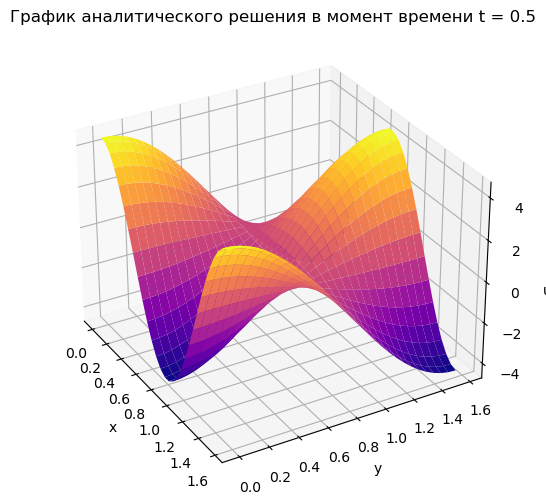

In [59]:
x1,y1 = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1, y1, u_a[int(J/2),:,:],  cmap = mpl.colormaps['plasma'])
# o1.view_init(30, 90)
ax.set_title('График аналитического решения в момент времени t = ' + str(round(tau*J/2,2)))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u")
ax.view_init(30, -30)
plt.show()

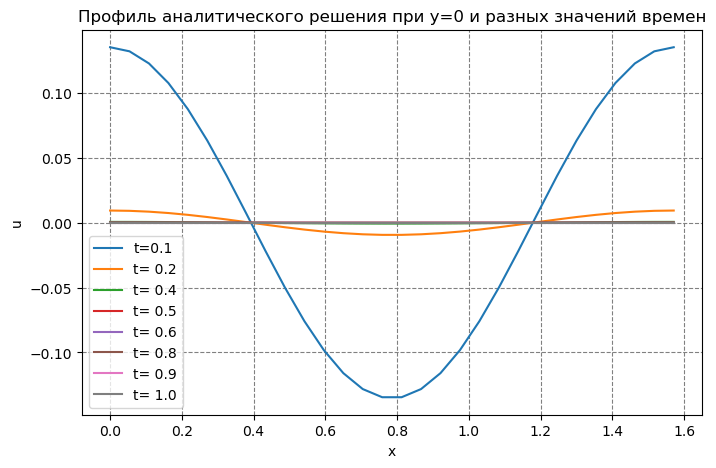

In [60]:
fig,ax=plt.subplots(figsize=(8,5))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического решения при y=0 и разных значений времен')

# plt.plot(x, u_a[:,0,int(0)],label='$t=$' + str(round(0,1)) + ' τ')
plt.plot(x, u_a[int(J/8), 0,:],label='t=' + str(round(tau*J/8,1)))
plt.plot(x, u_a[int(2*J/8), 0,:],label='t= ' +str(round(tau*2*J/8,1)))
plt.plot(x, u_a[int(3*J/8), 0,:],label='t= ' +str(round(tau*3*J/8,1)))
plt.plot(x, u_a[int(4*J/8), 0,:],label='t= ' +str(round(tau*4*J/8,1)))
plt.plot(x, u_a[int(5*J/8), 0,:],label='t= ' +str(round(tau*5*J/8,1)))
plt.plot(x, u_a[int(6*J/8), 0,:],label='t= ' +str(round(tau*6*J/8,1)))
plt.plot(x, u_a[int(7*J/8), 0,:],label='t= ' +str(round(tau*7*J/8,1)))
plt.plot(x, u_a[J-1, 0,:],label='t= ' +str(round(tau*8*J/8,1)))
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Таким образом, можно видеть, что с течением времени перенос тепла будет уменьшаться. Причем скорость уменьшения определяется экспоненциальным множетилем, а форма изменяться не будет  и определяется множителями синусом и косинусом.

## _Численное решение_
### _Разностная схема_

Введем разностную сетку в области $D$ = $G\times[0,T]$, $G = \{(x,y): 0 \leq x \leq \pi/2, 0 \leq y \leq \pi/2 \}$ с $N_x$ и $N_y$ числом узлов вдоль оси $x$ и $y$ и шагами $h_x$ и $h_y$ соответственно, с шагом $\tau$ и числом узлов $M$ по времени:

$$
\begin{equation}\label{grid}
	\begin{cases}
		{\omega}_x \equiv \{x_n = nh_x;~n = 0, 1, ... , N;~h_xN_x = \pi/2\}\\
		{\omega}_y \equiv \{y_m = mh_y;~m = 0, 1, ... , N_y;~h_yN_y = \pi/2\}\\
		{\omega}_t \equiv \{t_k = k\tau;~k = 0, 1, ... , M;~\tau M = T\}
	\end{cases}
\\
\omega_{xyt} = \omega_x\times\omega_y\times\omega_t
\end{equation}
$$

При решении задачи положим $T = 0.2$. Введем сеточную функцию: $u_{n,m}^k = u(x_n,y_m,t_k).$

Запишем разностную апроксимацию оператора Лапласа:

$$
    \begin{gather}
    \Delta u = \frac{\partial^2 u}{\partial^2 x} + \frac{\partial^2 u}{\partial^2 y} \label{eq33} \\
    \Lambda u^{k}_{n,m} = \Lambda_{x}u^{k}_{n,m} + \Lambda_{y}u^{k}_{n,m} \label{eq34} \\
    \Lambda_{x}u^{k}_{n,m} = \frac{u^{k}_{n+1,m}-2u^{k}_{n,m}+u^{k}_{n-1,m}}{h^{2}_{x}} \label{eq35} \\
    \Lambda_{y}u^{k}_{n,m} = \frac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h^{2}_{y}} \label{eq36} 
    \end{gather}
$$

Тогда уравнение для сеточной функции неявной схемы выглядит следующим образом:

$$
\begin{equation}\label{eq37}
     \frac{u^{k+1}_{n,m} - u^{k}_{n,m}}{\tau} = \Lambda u_{n,m}^{k+1} 
\end{equation}
$$

Аппроксимируем начальные и граничные условия задачи \eqref{eq1}:

$$
    \begin{gather}
    u_{n,m}^0 = \cos (4nh_x) \cos (2mh_y), \ n = 0, 1, ... , N_x,\ m = 0, 1, ... , N_y \label{eq38} \\
    \frac{u_{1,m}^k-u_{0,m}^k}{h_x} = \frac{u_{N_x,m}^k-u_{N_x-1,m}^k}{h_x} = 0, \ m = 0, 1, ... , N_y,\ k = 0, 1, ... , M\label{eq39} \\
    \frac{u_{n,1}^k-u_{n,0}^k}{h_y} = \frac{u_{n,N_y}^k-u_{n,N_y-1}^k}{h_y} = 0, \ n = 0, 1, ... , N_x,\ k = 0, 1, ... , M \label{eq40} 
    \end{gather}
$$

### _Метод переменных направлений_

При решении будем использовать метод переменных направлений, для чего введем промежуточный временной слой $t_{k+1/2} = \tau (k+1/2)$. Тогда на первом полуслое (от $t_{k}$ до $t_{k+1/2}$)  будем решать задачу, неявную по
направлению $x$ и явную по направлению $y$, а на втором полуслое (от $t_{k+1/2}$ до $t_{k+1}$) - явную по направлению $x$ и неявную по направлению $y$. Данная схема абсолютно устойчива.

Для первого и второго полуслоя задачи ставятся следующим образом:

$$
    \begin{gather}
    \frac{u^{k+1/2}_{n,m} - u^{k}_{n,m}}{\tau /2} = \Lambda_xu^{k+1/2}_{n,m} + \Lambda_yu^{k}_{n,m} \label{eq41} \\
	\frac{u^{k+1}_{n,m} - u^{k+1/2}_{n,m}}{\tau /2} = \Lambda_xu^{k+1/2}_{n,m} + \Lambda_yu^{k+1}_{n,m}\label{eq42} 
    \end{gather}
$$

Чтобы определить $u^{k+1/2}_{n,m}$ нужно решить задачи \eqref{eq41}, \eqref{eq42} методом прогонки. 



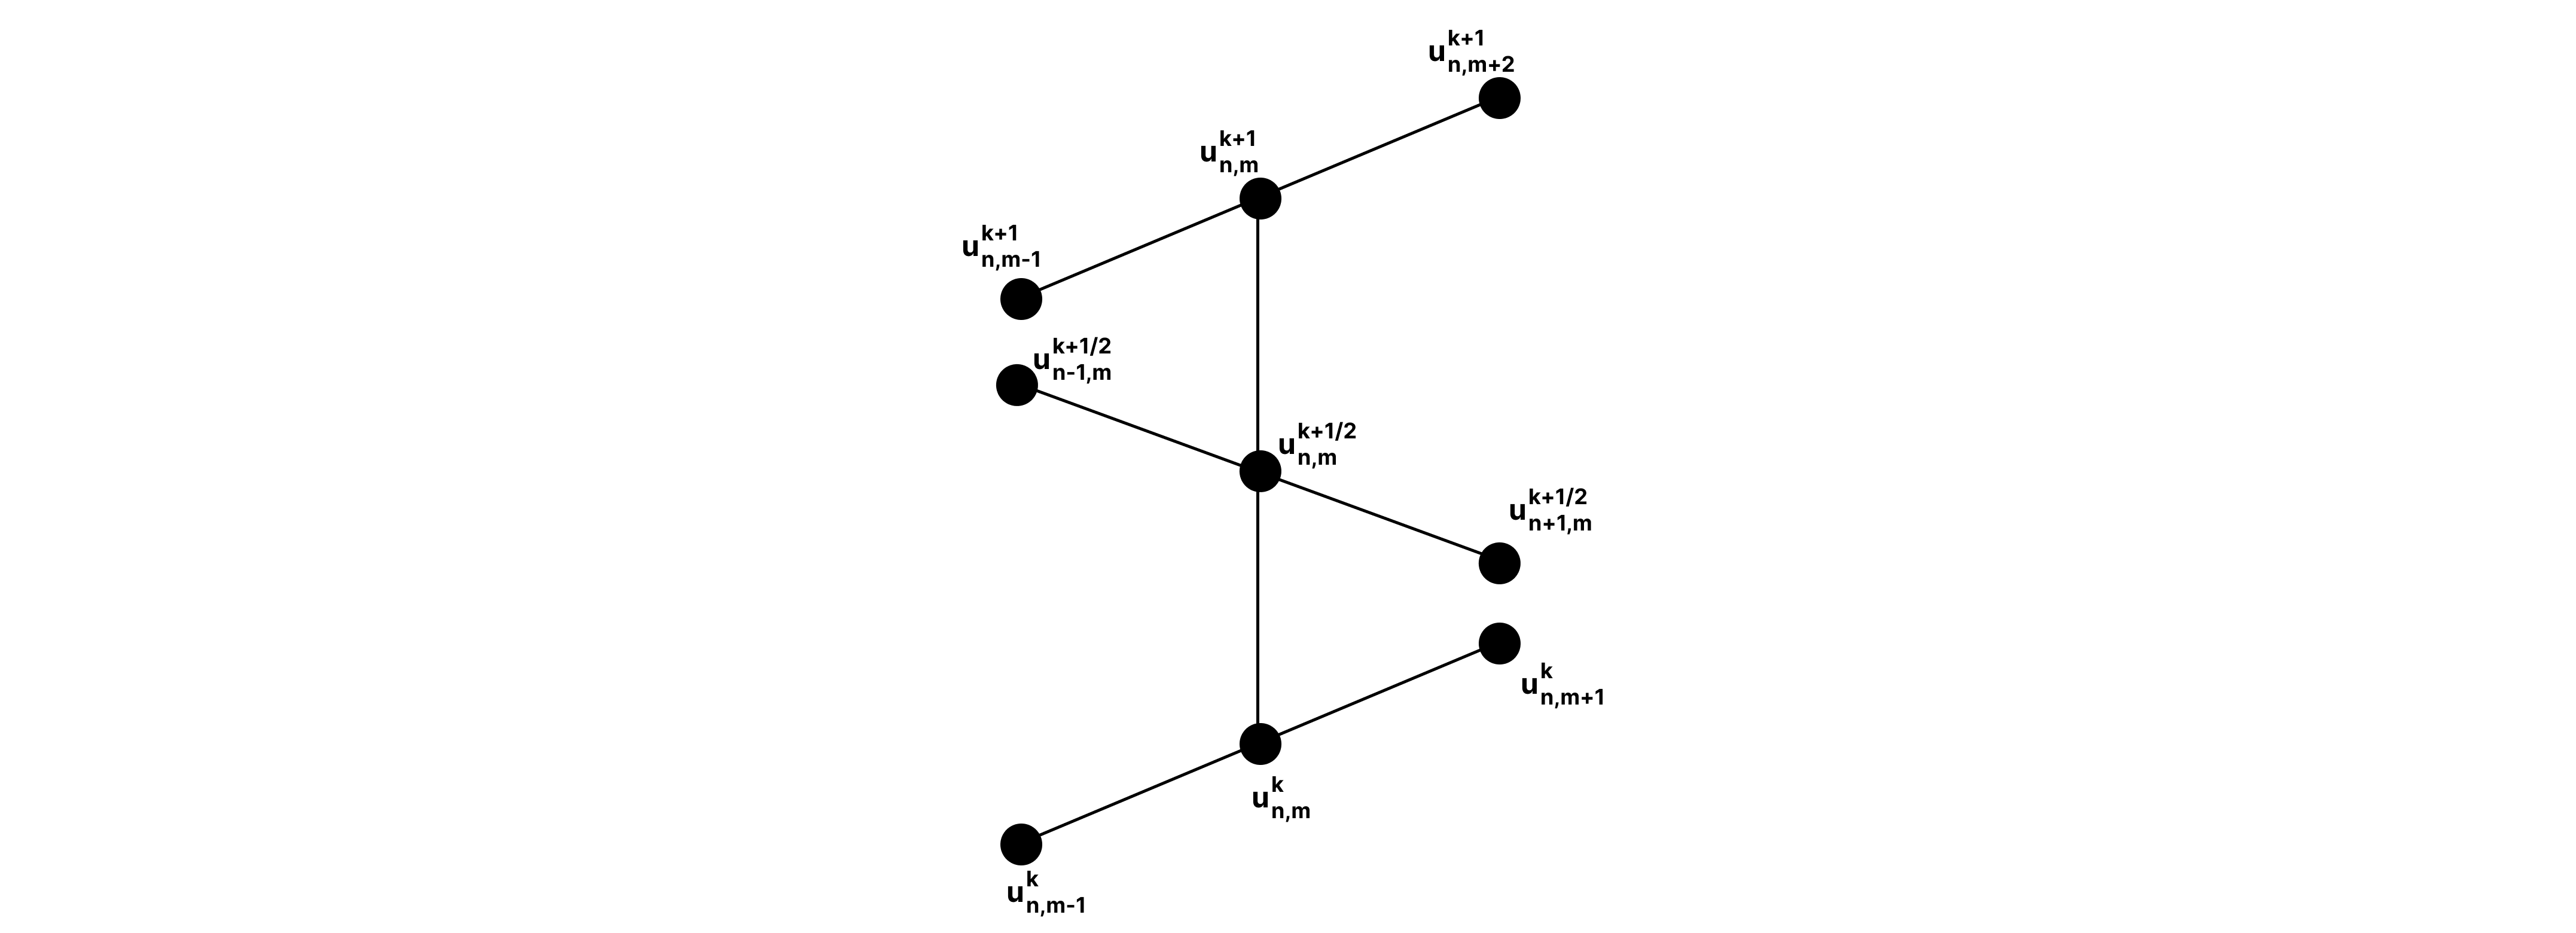

### _Метод прогонки_
Рассмотрим задачу \eqref{eq41}. Раскроем оператор Лапласа и умножим на $\tau/2$ с обеих сторон:

$$
\begin{equation}\label{eq43}
     u^{k+1/2}_{n,m} - u^{k}_{n,m} = \frac{\tau}{2}\frac{u^{k+1/2}_{n+1,m} -2 u^{k+1/2}_{n,m} + u^{k+1/2}_{n-1,m}}{h_{x}^2} + \frac{\tau}{2}\frac{u^{k}_{n,m+1} -2 u^{k}_{n,m} + u^{k}_{n,m-1}}{h_{y}^2}
\end{equation}
$$

Обозначим неизвестные - $u^{k+1/2}_{n+1,m}, u^{k+1/2}_{n,m}, u^{k+1/2}_{n-1,m}$ - соответственно $y_{n+1}, y_{n}, y_{n-1}$. Перепишем уравнение \eqref{eq43} в виде:

$$
\begin{equation}\label{eq44}
     A_n y_{n-1} + B_n y_{n} + C_n y_{n+1} = F_n,
\end{equation}
$$

где 
$$
    \begin{gather}
    A_n = \frac{\tau}{2h_x^2} \label{eq45} \\
	B_n = -1-\frac{\tau}{h_x^2} \label{eq46} \\
	C_n = \frac{\tau}{2h_x^2} \label{eq47} \\
	F_n = - \frac{\tau}{2}\frac{u^{k}_{n,m+1} -2 u^{k}_{n,m} + u^{k}_{n,m-1}}{h_{y}^2} - u^{k}_{n,m} \label{eq48}
    \end{gather}
$$

Каждое предыдущее значение $y_n$ можно выразить через последующее (формула обратной прогонки):

$$
\begin{equation}\label{eq49}
     y_{n} = \alpha_{n+1}y_{n+1}+\beta_{n+1}
\end{equation}
$$

Подставим выражение для $y_{n-1}$ в \eqref{eq44}:

$$
    \begin{gather}
    A_n (\alpha_{n}y_{n}+\beta_{n}) + B_n y_{n} + C_n y_{n+1} = F_n \label{eq50} \\
	y_{n} = -\frac{C_n}{\alpha_{n} A_n + B_n} y_{n+1}+\frac{F_n-A_n \beta_{n}}{\alpha_{n} A_n + B_n} \label{eq51} 
    \end{gather}
$$

Сравнивая выражения \eqref{eq49} и \eqref{eq51}, получаем:

$$
    \begin{gather}
    \alpha_{n+1} =  -\frac{C_n}{\alpha_{n} A_n + B_n} \label{eq52} \\
	\beta_{n+1} = \frac{F_n-A_n \beta_{n}}{\alpha_{n} A_n + B_n} \label{eq53} 
    \end{gather}
$$

Мы получили формулы прямой прогонки.
Из граничных условий мы получаем, что:

$$
    \begin{gather}
    \frac{y_1 - y_0}{h_x} =  0 \label{eq54} \\
	y_0 = \alpha_{1} y_1 + \beta_{1} = y_1 \ \Rightarrow \ \alpha_{1} = 1, \beta_{1} = 0 \label{eq55} \\
	\frac{y_{N_x} - y_{N_x-1}}{h_x} =  0 \label{eq56} \\
	y_{N_x-1} = \alpha_{N_x} y_{N_x} + \beta_{N_x} = y_{N_x} \ \Rightarrow \ y_{N_x} = \frac{\beta_{N_x}}{1 - \alpha_{N_x}} \label{eq57}
    \end{gather}
$$

Аналогично мы решаем неявную задачу по $y$. Поскольку граничные условия в нашей задаче совпадают, разницы не будет. 

### _Порядок аппроксимации_

Разложим разностный оператор $\Lambda_x$ в ряд Тейлора

$$
\frac{u^{k}_{n+1,m}-2u^{k}_{n,m}+u^{k}_{n-1,m}}{h^{2}_{x}} = \frac{1}{h^2_x}\left(h_x^2u^{k(2)}_{n,m} + \frac{h_x^4}{12}u^{k(4)}_{n,m}\right) \sim O\left(h^2_x\right)
$$


$$
\frac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h^{2}_{y}} = \frac{1}{h^2_y}\left(h_y^2u^{k(2)}_{n,m} + \frac{h_y^4}{12}u^{k(4)}_{n,m}\right) \sim O\left(h^2_y\right)
$$

То есть порядок аппроксимации по пространственным координатам компонентам равен $O\left(h_x^2+h_y^2\right)$. 

Но граничные условия Неймана аппроксимируются односторонней производной, поэтому разностная схема в нашем случае имеет первый порядок точности по координатам.

$$
\frac{u^{k}_{n+1,m}-u^{k}_{n,m}}{h_{x}} = \frac{1}{h_x}\left((u^{k}_{n,m})' + \frac{h_x^2}{2}(u^{k}_{n,m})''\right) \sim O\left(h_x\right)\\
\frac{u^{k}_{n,m+1}-u^{k}_{n,m}}{h_{y}} = \frac{1}{h_y}\left((u^{k}_{n,m})' + \frac{h_y^2}{2}(u^{k}_{n,m})''\right) \sim O\left(h_y\right)
$$

Чтобы найти порядок аппроксимации по временной компоненте разложим в ряд Тейлора до соответствующих порядков производные по вермени

$$
\begin{equation}
	\begin{cases}
		u^{k+1} = u^{k+1/2} + \frac{\tau}{2}u_t^{k+1/2}+\frac{1}{2}\frac{\tau^2}{4}u^{k+1/2}_{tt}+\frac{1}{2}\frac{\tau^3}{8}u^{k+1/2}_{ttt} + O\left(\tau^4\right)\\
		u^{k} = u^{k+1/2} - \frac{\tau}{2}u_t^{k+1/2}+\frac{1}{2}\frac{\tau^2}{4}u^{k+1/2}_{tt}-\frac{1}{2}\frac{\tau^3}{8}u^{k+1/2}_{ttt} + O\left(\tau^4\right)
	\end{cases}
\end{equation}
$$

Тогда в точке $t^{k+1/2}$ аппроксимация производной по времени будет выглядеть

$$
\frac{u^{k+1}-u^{k}}{\tau} = \frac{1}{\tau}\left(\tau u^{k+1/2}_t + \frac{1}{3}\frac{\tau^3}{8}u^{k+1/2}_{ttt} + O(\tau^4)\right) = u^{k+1/2}_t+O(\tau^2)
$$

Невязка равна $O\left(h_x+h_y+\tau^2\right)$.

### _Устойчивость_

Устойчивость схемы по начальным данным будем исследовать с помощью спектрального метода Ньютона. Система разностных уравнений, реализующих метод переменных направлений

$$
\begin{equation}
	\begin{cases}
		\frac{\tau}{2h_x^2}u^{k+1/2}_{n+1,m}-\left(1+\frac{\tau}{h_x^2}\right)u^{k+1/2}_{n,m}+\frac{\tau}{2h_x^2}u^{k+1/2}{n-1,m}=0\\
		\frac{\tau}{2h_y^2}u^{k+1}_{n,m+1}-\left(1+\frac{\tau}{h_y^2}\right)u^{k+1}_{n,m}+\frac{\tau}{2h_y^2}u^{k+1}{n,m-1}=0
	\end{cases}
\end{equation}
$$

Ищем решение в виде
$$
\begin{equation}
	\begin{cases}
		u^{k+1/2}_{n,m} = \lambda_1e^{i(\alpha n+\beta m)}\\
		u^{k+1}_{n,m} = \lambda_2e^{i(\alpha n+\beta m)}
	\end{cases}
\end{equation}
$$

После подстановки получается

$$
\frac{\lambda_1-1}{1/2\tau} = \lambda_1\frac{e^{i\alpha}-2+e^{-i\alpha}}{h_x^2}+\frac{e^{i\beta}-2+e^{-i\beta}}{h^2_y}\\
\frac{\lambda_2-1}{1/2\tau} = \frac{e^{i\alpha}-2+e^{-i\alpha}}{h_x^2}+\lambda_2\frac{e^{i\beta}-2+e^{-i\beta}}{h^2_y}
$$

Таким образом
$$
\lambda_1 = \frac{1-\frac{2\tau}{h_y^2}\sin^2\frac{\beta}{2}}{1 + \frac{2\tau}{h_x^2}\sin^2\frac{\alpha}{2}} < 1,\ \ 
\lambda_2 = \frac{1-\frac{2\tau}{h_x^2}\sin^2\frac{\alpha}{2}}{1 + \frac{2\tau}{h_y^2}\sin^2\frac{\beta}{2}} < 1,\\ \forall \tau, h_x, h_y, \alpha, \beta.
$$

Следовательно

$$
|\lambda_1\lambda_2| = \left|\left(\frac{1-\frac{2\tau}{h_y^2}\sin^2\frac{\beta}{2}}{1 + \frac{2\tau}{h_x^2}\sin^2\frac{\alpha}{2}}\right)\cdot\left(\frac{1-\frac{2\tau}{h_x^2}\sin^2\frac{\alpha}{2}}{1 + \frac{2\tau}{h_y^2}\sin^2\frac{\beta}{2}}\right)\right|\leq 1
$$

Значит критерий Неймана выполняется при переходе с $k$-ого слоя на $(k+1)$-ый. Так как это выполнено $\forall \tau, h_x, h_y, \alpha, \beta$ то схема переменных направлений безусловно устойчива.

### _Програмная реализация численного решения_
#### _Необходимые функции для метода прогонки_

In [61]:
def borderx(u, y):
#     (u[:, 1]-u[, 0:])/h_x=(u[:, N]-u[:, N-1])/h_x=0
    u[:, 0] = u[:, 1]
    u[:, -1] = u[:, -2]
    return u

def bordery(u, x):
#     (u[1, :]-u[0,:])/h_y=(u[M, :]-u[M-1,:])/h_y=0
    u[0, :] = u[1, :]
    u[-1, :] = u[-2, :]
    return u

In [62]:
def progonka_x(u, i1, j):
    A = np.zeros((u.shape[0], u.shape[0]))

    A[0, 0], A[0, 1] = 1, -1
    A[-1, -1], A[-1, -2] = 1, -1
    for i in range(1, A.shape[0]-1):
        A[i, i-1] = 1/h_x**2
        A[i, i] = -2/h_t-2/h_x**2
        A[i, i+1] = 1/h_x**2
        
    F = np.zeros((u.shape[0]))
    F[0] = 0
    F[-1] = 0
    for i in range(1, F.shape[0]-1):
        y = i*h_y+h_y
        F[i] = -2/h_t*u[i, i1]-1/h_y**2*(u[i, i1+1]-2*u[i, i1]+u[i, i1-1])
    F = F.reshape((F.shape[0], 1))
        
    a = np.zeros((A.shape[0]))
    b = np.zeros_like(a)
    for i in range(A.shape[0]-1):
        if i == 0:
            a[i] = -A[i, i+1]/A[i, i]
        else:
            a[i] = A[i, i+1]/(-A[i, i]-a[i-1]*A[i, i-1])
            
    x = i1*h_x+h_x
    t = j*h_t

    
    for i in range(A.shape[0]):
        if i == 0:
            b[i] = F[i, 0]/A[i, i]
        else:
            b[i] = (-F[i, 0]+A[i, i-1]*b[i-1])/(-A[i, i]-a[i-1]*A[i, i-1])

    y = np.zeros_like(a)
    for i in range(A.shape[0]-1, -1, -1):
        if i == A.shape[0]-1:
            y[i] = b[i]
        else:
            y[i] = a[i]*y[i+1]+b[i]
    
    return y

In [63]:
def progonka_y(u, i2, j):
    A = np.zeros((u.shape[1], u.shape[1]))

    A[0, 0], A[0, 1] = 1, -1
    A[-1, -1], A[-1, -2] = 1, -1
    for i in range(1, A.shape[0]-1):
        A[i, i-1] = 1/h_x**2
        A[i, i] = -2/h_t-2/h_x**2
        A[i, i+1] = 1/h_x**2
        
    F = np.zeros((u.shape[1]))
    F[0] = 0
    F[-1] = 0
    for i in range(1, F.shape[0]-1):
        x = i*h_x+h_x
        F[i] = -2/h_t*u[i2, i]-1/h_y**2*(u[i2+1, i]-2*u[i2, i]+u[i2-1, i])
    F = F.reshape((F.shape[0], 1))
        
    a = np.zeros((A.shape[0]))
    b = np.zeros_like(a)
    
    for i in range(A.shape[0]-1):
        if i == 0:
            a[i] = -A[i, i+1]/A[i, i]
        else:
            a[i] = A[i, i+1]/(-A[i, i]-a[i-1]*A[i, i-1])
            
    y = i2*h_y+h_y
    t = j*h_t
    
    for i in range(A.shape[0]):
        if i == 0:
            b[i] = F[i, 0]/A[i, i]
        else:
            b[i] = (-F[i, 0]+A[i, i-1]*b[i-1])/(-A[i, i]-a[i-1]*A[i, i-1])

    y = np.zeros_like(a)
    for i in range(A.shape[0]-1, -1, -1):
        if i == A.shape[0]-1:
            y[i] = b[i]
        else:
            y[i] = a[i]*y[i+1]+b[i]
    
    return y

In [64]:
def calculate(w):
    for i in tqdm(range(J)):
        time.sleep(1)
        for j in range(0, J-1):
            #на j+1/2 слое
            u = np.zeros((w.shape[1], w.shape[2]))
            for i2 in range(1, M-1):
                u[i2] = progonka_y(w[j], i2, j)
            u = bordery(u, x)

            #на j+1 слое
            for i1 in range(1, N-1):
                w[j+1, :, i1] = progonka_x(u, i1, j)
            w[j+1] = borderx(w[j+1], y)
    return w

#### _Инициализация нашей задачи_

In [65]:
h_x = (x_end-x_start)/(N-1)
h_y = (y_end-y_start)/(M-1)
h_t = (t_end-t_start)/J

x = np.linspace(x_start-h_x/2, x_end+h_x/2, N)
y = np.linspace(y_start-h_y/2, y_end+h_y/2, M)
t = np.linspace(t_start, t_end, J)

w = np.zeros((J, M, N))

X, Y = np.meshgrid(x, y)
w[0] = np.cos(4*X)*np.cos(2*Y)

w =  calculate(w)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:38<00:00,  1.27s/it]


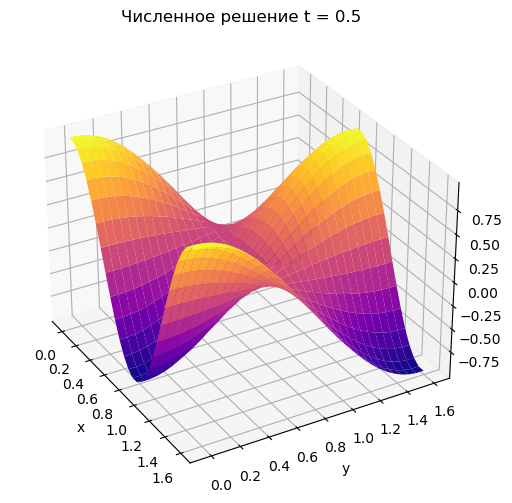

In [66]:
tt=0.5
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, w[int(t/(2*h_t))])
ax.plot_surface(X, Y, w[int(tt/J)], rstride = 1, cstride = 1, cmap = mpl.colormaps['plasma'])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u")
# ax.set_zlim(-4, 4)
ax.set_title("Численное решение t = " + str(tt))
ax.view_init(30, -30)
plt.show()

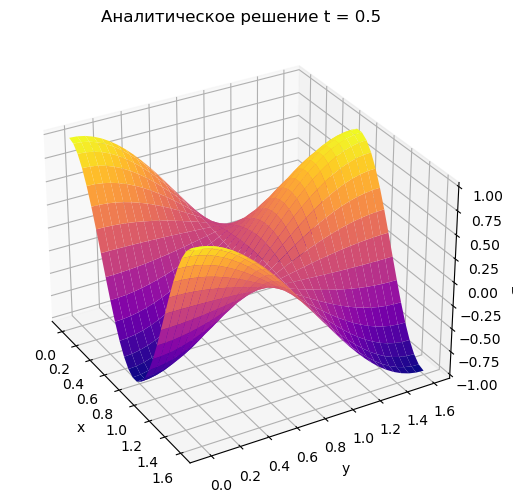

In [67]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, w[int(t/(2*h_t))])
ax.plot_surface(X, Y, u_a[int(tt/J)], rstride = 1, cstride = 1, cmap = mpl.colormaps['plasma'])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u")
ax.set_title("Аналитическое решение t = " + str(tt))
ax.view_init(30, -30)
plt.show()

#### _Проверка выполнения граничных условий_

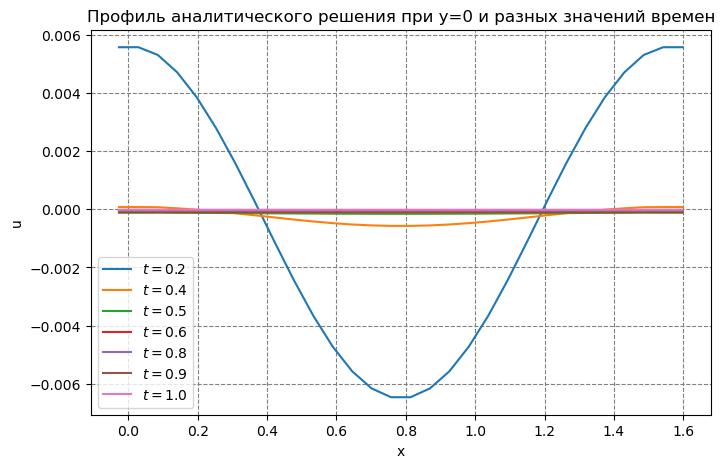

In [68]:
fig,ax=plt.subplots(figsize=(8,5))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического решения при y=0 и разных значений времен')

# plt.plot(x, u_a[:,0,int(0)],label='$t=$' + str(round(0,1)) + ' τ')
# plt.plot(x, w[int(J/8), 0, :],label='$t=$' + str(round(h_t*J/8,1)))
plt.plot(x, w[int(2*J/8), 0, :],label='$t= $' +str(round(h_t*2*J/8,1)))
plt.plot(x, w[int(3*J/8), 0, :],label='$t= $' +str(round(h_t*3*J/8,1)))
plt.plot(x, w[int(4*J/8), 0, :],label='$t= $' +str(round(h_t*4*J/8,1)))
plt.plot(x, w[int(5*J/8), 0, :],label='$t= $' +str(round(h_t*5*J/8,1)))
plt.plot(x, w[int(6*J/8), 0, :],label='$t= $' +str(round(h_t*6*J/8,1)))
plt.plot(x, w[int(7*J/8), 0, :],label='$t= $' +str(round(h_t*7*J/8,1)))
plt.plot(x, w[J-1, 0, :],label='$t= $' +str(round(h_t*8*J/8,1)))
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

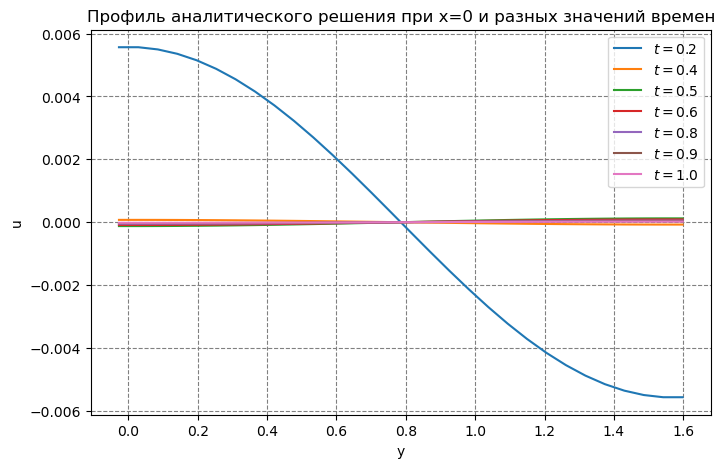

In [69]:
fig,ax=plt.subplots(figsize=(8,5))
plt.xlabel('y')
plt.ylabel('u')
plt.title('Профиль аналитического решения при x=0 и разных значений времен')

# plt.plot(x, u_a[:,0,int(0)],label='$t=$' + str(round(0,1)) + ' τ')
# plt.plot(x, w[int(J/8), :, 0],label='$t=$' + str(round(h_t*J/8,1)))
plt.plot(x, w[int(2*J/8), :, 0],label='$t= $' +str(round(h_t*2*J/8,1)))
plt.plot(x, w[int(3*J/8), :, 0],label='$t= $' +str(round(h_t*3*J/8,1)))
plt.plot(x, w[int(4*J/8), :, 0],label='$t= $' +str(round(h_t*4*J/8,1)))
plt.plot(x, w[int(5*J/8), :, 0],label='$t= $' +str(round(h_t*5*J/8,1)))
plt.plot(x, w[int(6*J/8), :, 0],label='$t= $' +str(round(h_t*6*J/8,1)))
plt.plot(x, w[int(7*J/8), :, 0],label='$t= $' +str(round(h_t*7*J/8,1)))
plt.plot(x, w[J-1, :, 0],label='$t= $' +str(round(h_t*8*J/8,1)))
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Как видно, у численного решения выполняются граничные условия, а также, как и у аналитического, наблюдается тенденция уменьшения с течением времени.

###  _Погрешность_

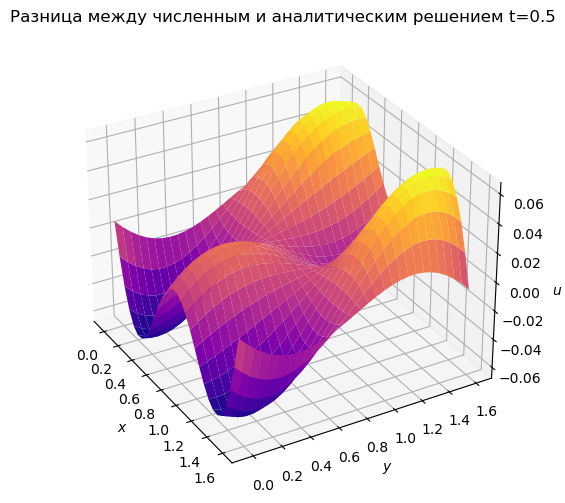

In [70]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, w[int(t/(2*h_t))])
ax.plot_surface(X, Y, u_a[int(tt/J)]-w[int(tt/J)], rstride = 1, cstride = 1, cmap =mpl.colormaps['plasma'])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
ax.set_title("Разница между численным и аналитическим решением t={}".format(tt))
ax.view_init(30, -30)

In [71]:
np.abs(w[int(tt/J), int(yy/M), int(0.3/N)]-u_a[int(tt/J), int(yy/M), int(0.3/N)])

0.00732003180367502

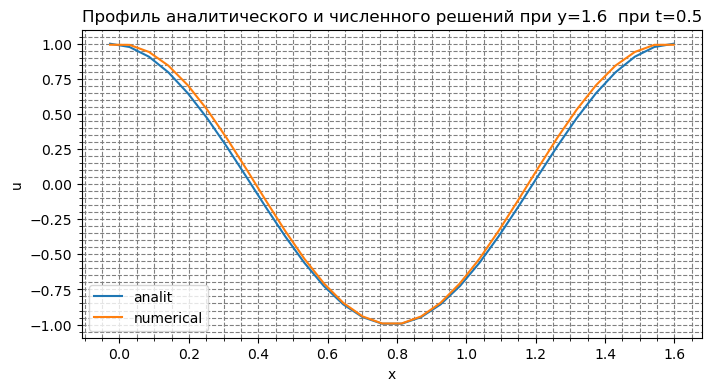

In [72]:
# tt=0.1
yy=1.6
fig,ax=plt.subplots(figsize=(8,4))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического и численного решений при y=' + str(yy) + '  при t=' + str(tt))

# plt.plot(x, u_anal-w[int(tt/J), :, 0])
plt.plot(x, u_a[int(tt/J), int(yy/M), :], label="analit")
plt.plot(x, w[int(tt/J), int(yy/M), :], label="numerical")
ax.minorticks_on()
ax.grid(which='both', color = 'gray',ls='--')
ax.legend(loc='best')

(-1.0, 1.0)

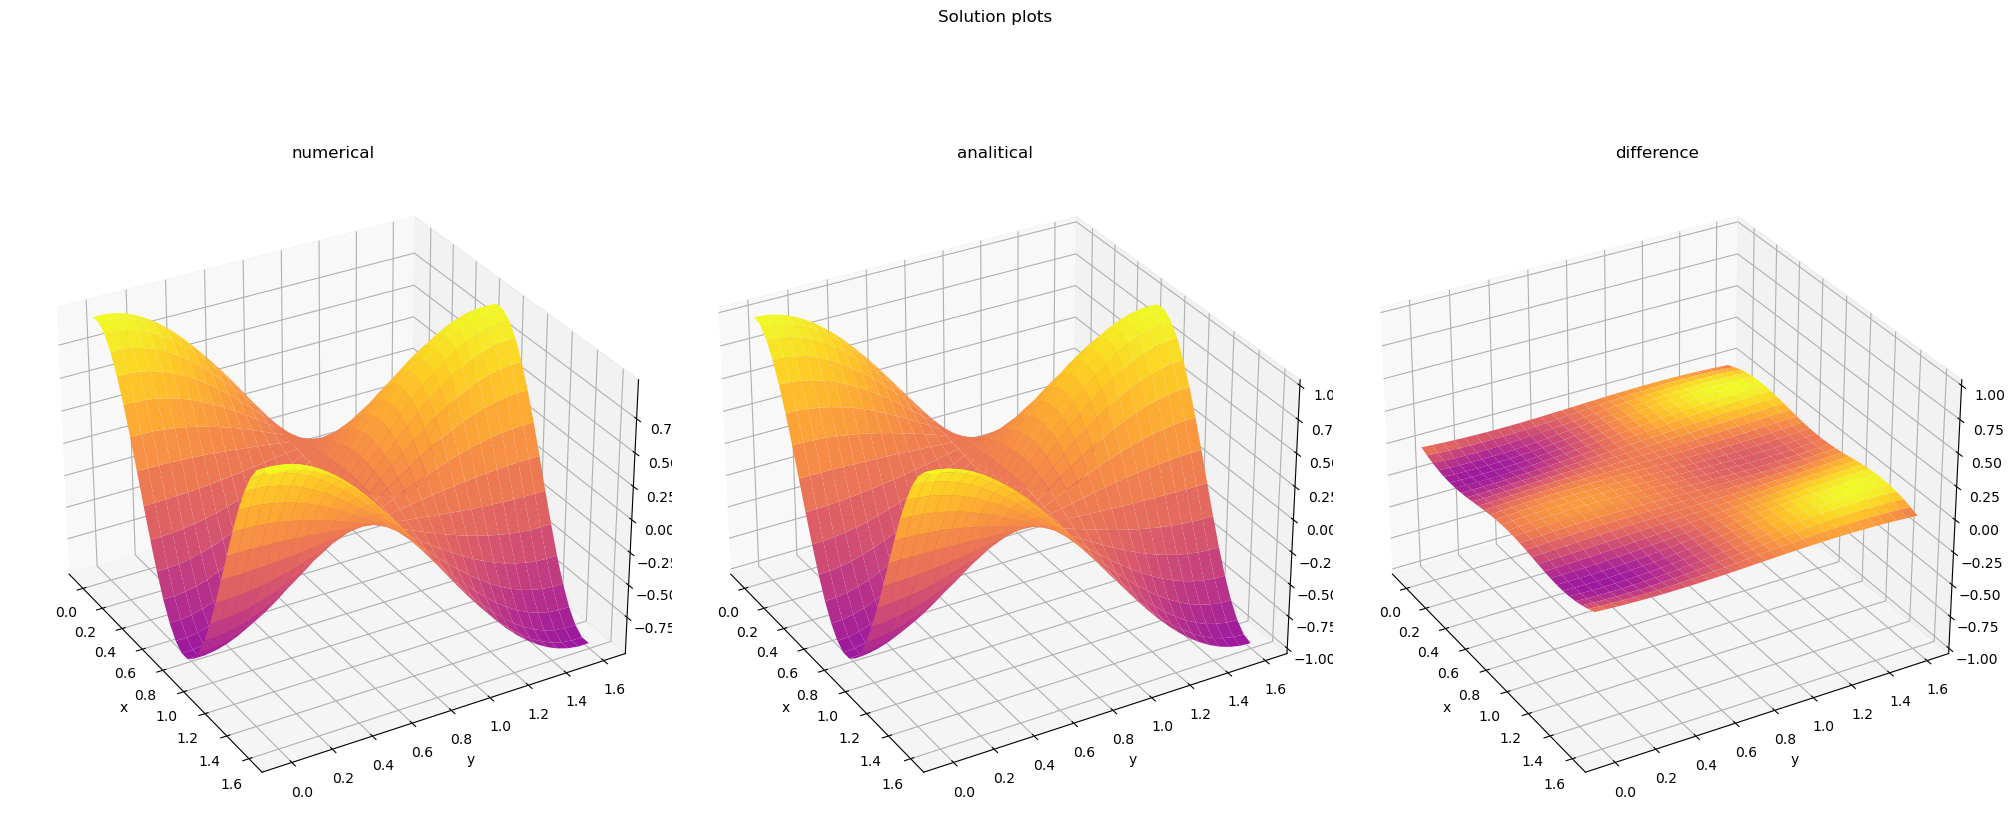

In [73]:
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(20,10))
fig.tight_layout()
fig.suptitle('Solution plots')
ax[0].plot_surface(X, Y, w[int(tt/J)], vmin=w[int(tt/J)].min() * 2, cmap=mpl.colormaps['plasma'])
ax[0].set_title('numerical')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].view_init(30, -30)

ax[1].plot_surface(X, Y, u_a[int(tt/J)], vmin=u_a[int(tt/J)].min() * 2, cmap=mpl.colormaps['plasma'])
ax[1].set_title('analitical')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].view_init(30, -30)

ax[2].plot_surface(X, Y, u_a[int(tt/J)]-w[int(tt/J)], vmin=(u_a[int(tt/J)]-w[int(tt/J)]).min() * 2, cmap=mpl.colormaps['plasma'])
ax[2].set_title('difference')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].view_init(30, -30)
ax[2].set_zlim(-1, 1)

### _Сгущение сетки_

N = M = J = 10

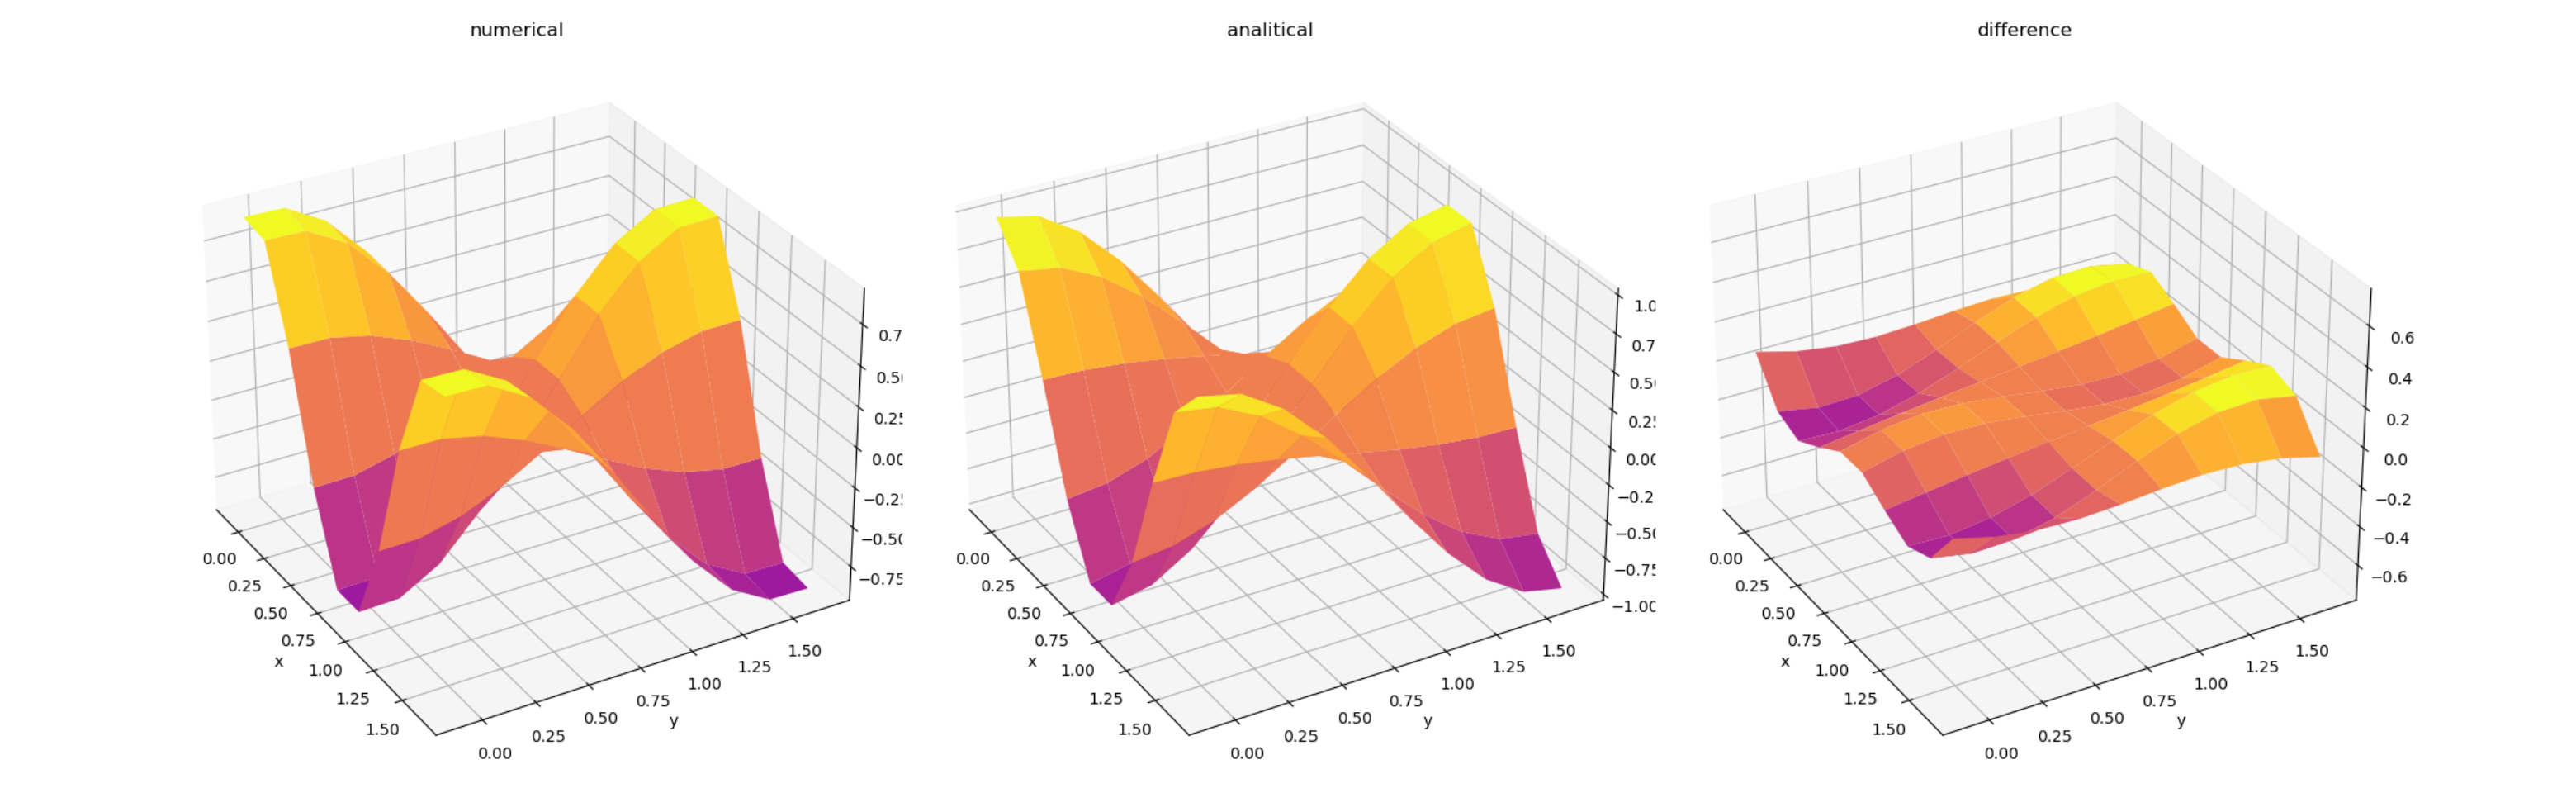

N = M = J = 20

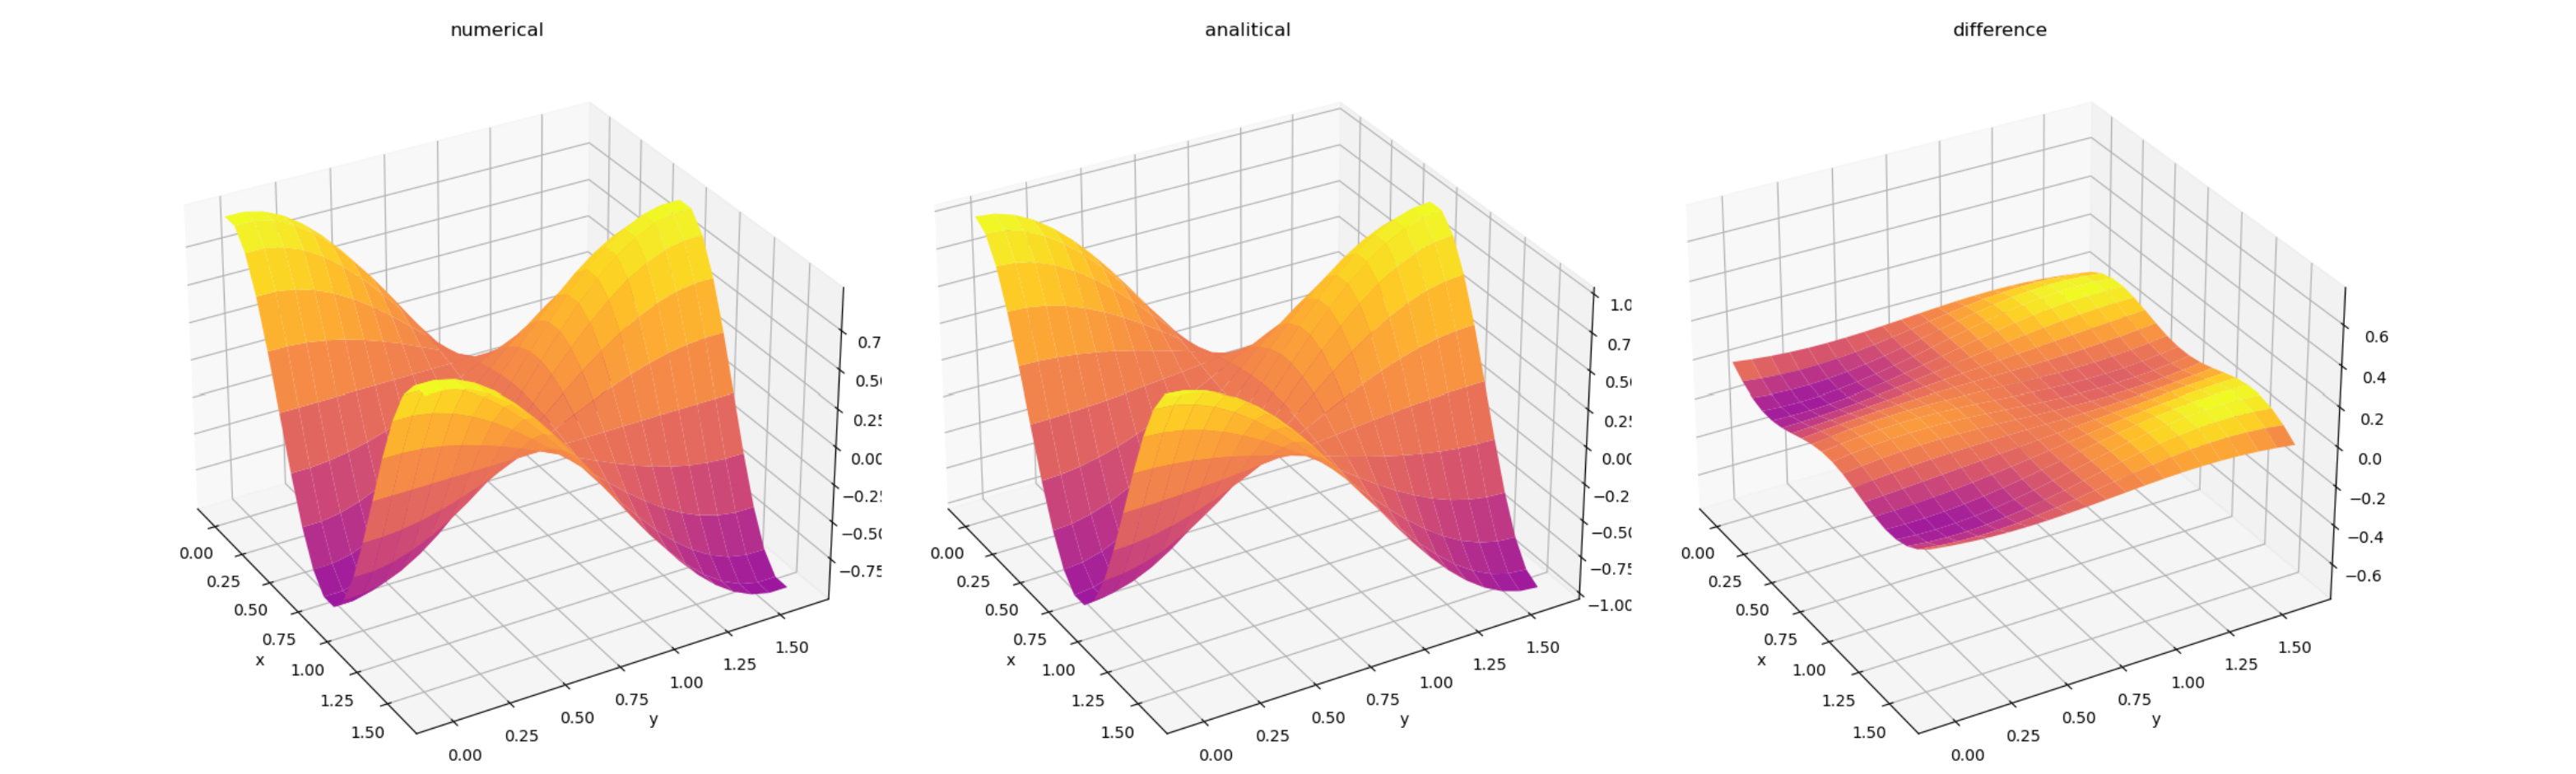

N = M = J = 50

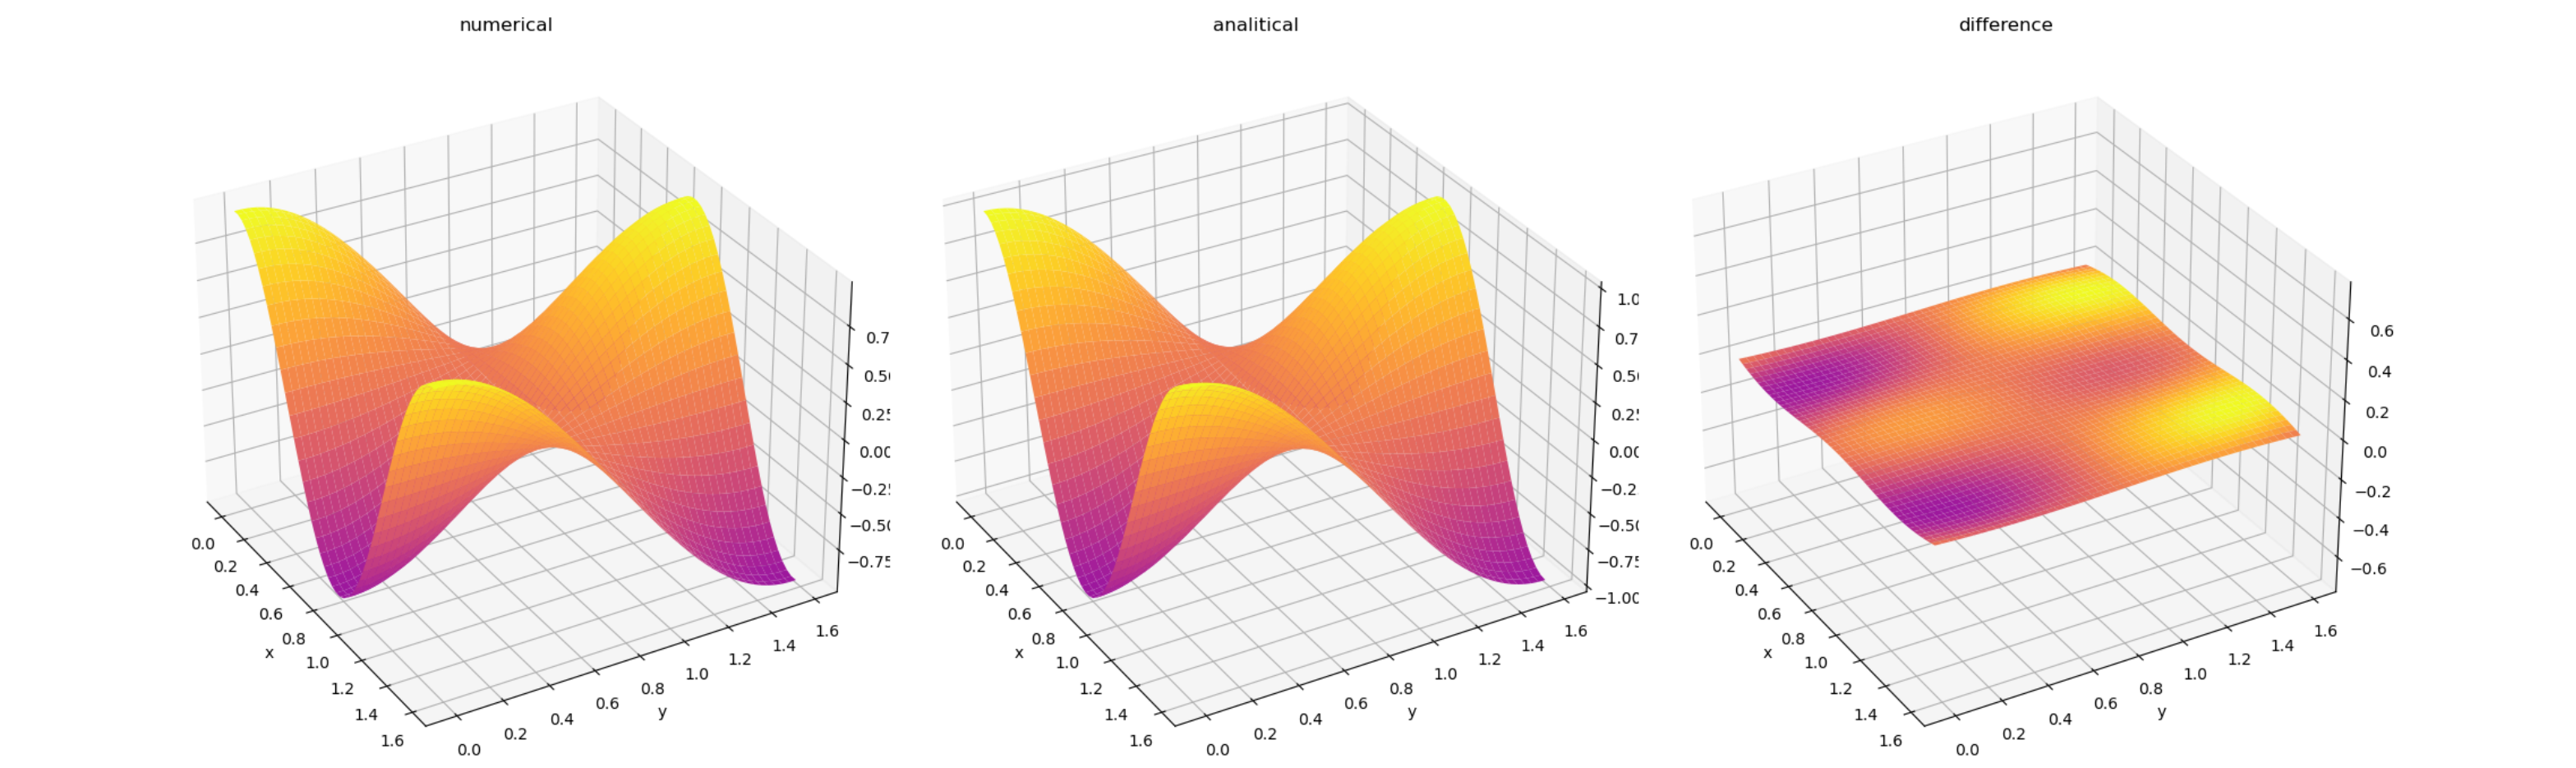

N = M = J = 100

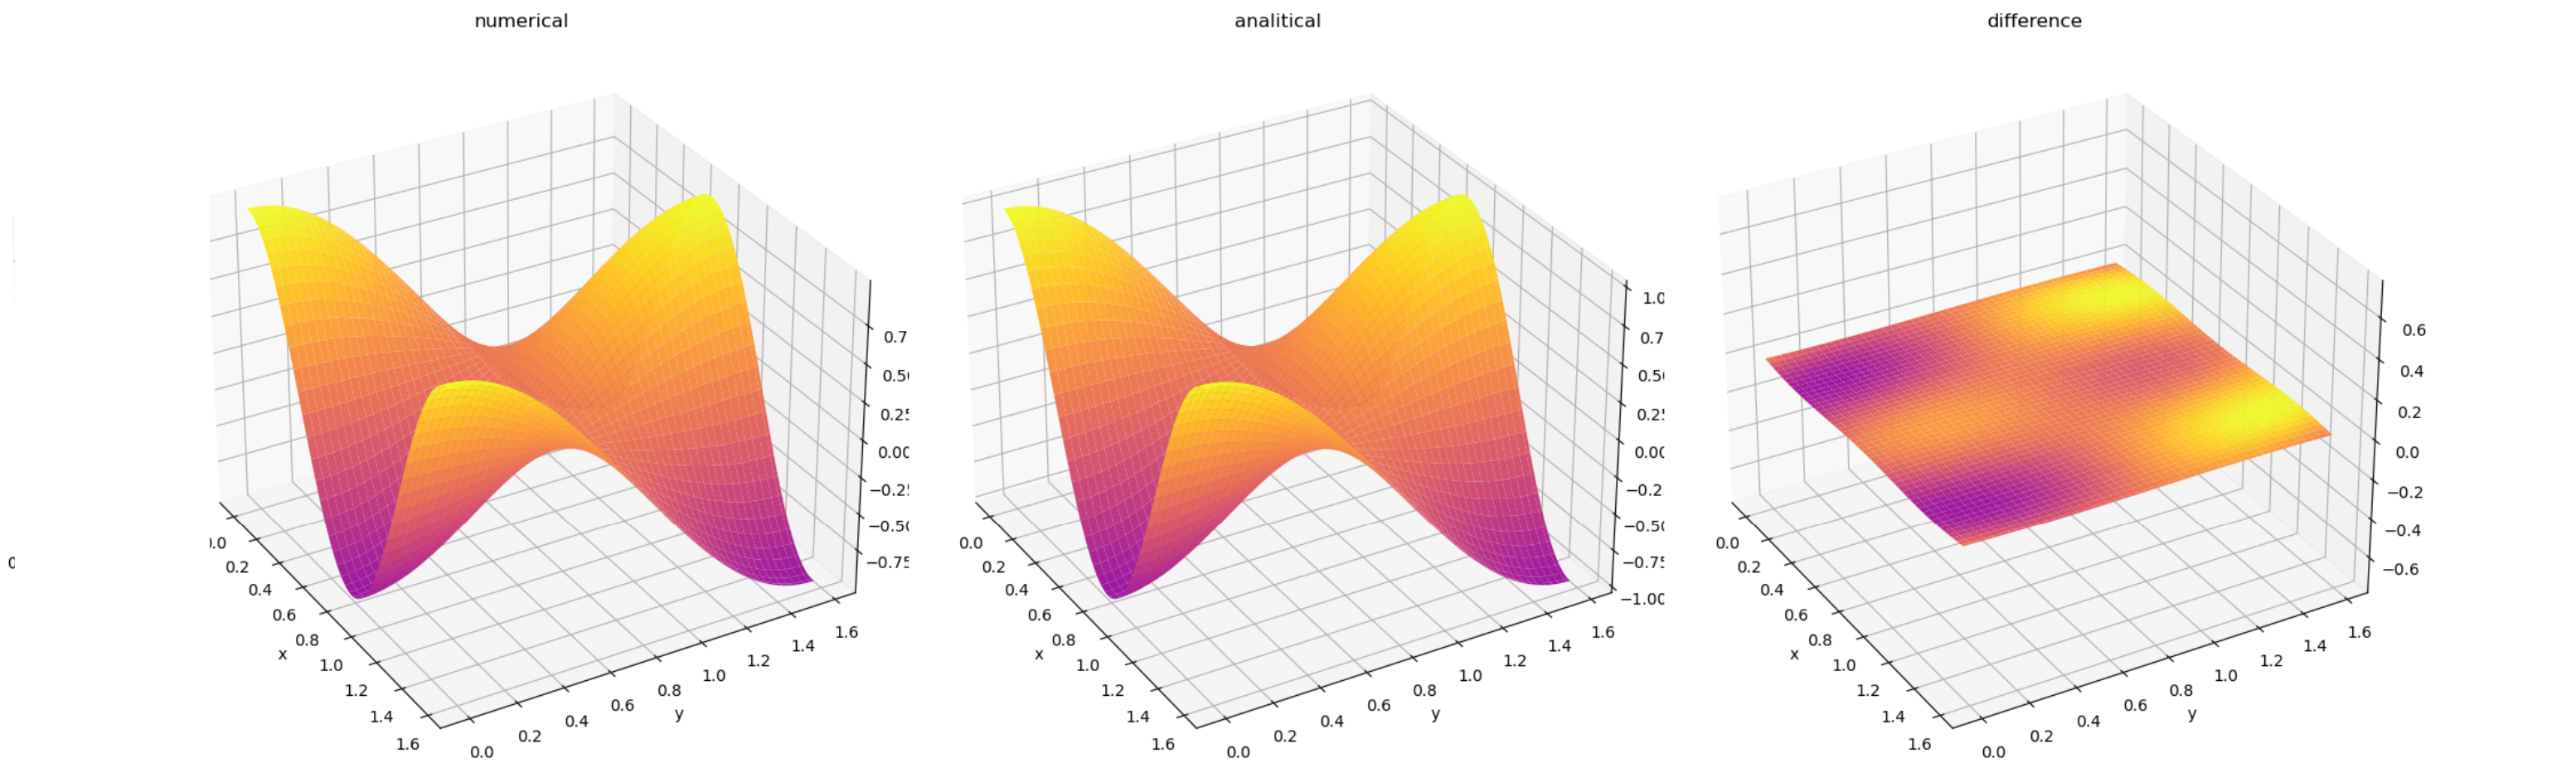